In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [17]:
ls data

160725-143700.dat  160727-171220.dat  160727-182214.dat  160801-160657.dat
160725-143859.dat  160727-172935.dat  160727-182305.dat  160801-160657.pdf
160725-143953.dat  160727-173142.dat  160727-182506.dat  160801-165104.dat
160725-144223.dat  160727-173637.dat  160729-162421.dat  160801-165104.pdf
160725-144326.dat  160727-173723.dat  160729-162437.dat  160801-165301.dat
160725-151154.dat  160727-174126.dat  160801-113539.dat  160801-165301.pdf
160725-174600.dat  160727-174357.dat  160801-120813.dat  160801-165843.dat
160725-175032.dat  160727-175808.dat  160801-155403.dat  160801-165843.pdf
160725-180708.dat  160727-180436.dat  160801-155450.dat  160801-173758.dat
160727-170139.dat  160727-180527.dat  160801-155540.dat  160801-184758.dat
160727-170517.dat  160727-181131.dat  160801-155540.pdf  160801-184758.pdf
160727-170633.dat  160727-181241.dat  160801-155848.dat  Untitled.ipynb
160727-171000.dat  160727-181932.dat  160801-155848.pdf


In [31]:
# datafile = 'data/160725-171642.dat'
# datafile = 'data/160720-190506.dat'
datafile = 'data/160801-184758.dat'
base = datafile.rsplit('.dat')[0]
pdffile = base+'.pdf'
jpgfile = base+'.jpg'

In [39]:
data = pd.read_csv(datafile, delimiter='\t', comment='#',names=['date','time','Ve','Ig','Ic'],\
           dtype={'Ve':'float64','Ig':'float64','Ic':'float64'})

In [40]:
### Omit abnormal data

ignore1 = data['Ig'].abs() > 5e+0
ignore2 = data['Ic'].abs() > 5e+0
# data[(ignore1 | ignore2) == False]
data = data[(ignore1 | ignore2) == False]

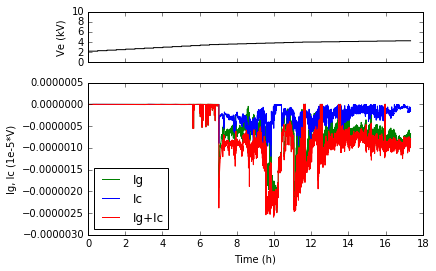

In [44]:
# fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])




time_h = data['time']/3600

ax1.set_ylabel('Ve (kV)')
ax1.set_ylim(0,10)
ax1.set_xticklabels('')
ax2.set_ylabel('Ig, Ic (1e-5*V)')
ax2.set_xlabel('Time (h)')

ax1.plot(time_h, data['Ve']/1e3, 'k-')
ax2.plot(time_h, data['Ig']/1e5, 'g-', label='Ig')
ax2.plot(time_h, data['Ic']/1e5, 'b-', label='Ic')
ax2.plot(time_h, (data['Ic']+data['Ig'])/1e5, 'r-', label='Ig+Ic')
ax2.legend(loc='lower left')
# plt.savefig(pdffile)
# plt.savefig(jpgfile)

In [16]:
data['Ig'].sum()*1e-5

-0.00021236487000000001